# Задание
### Преподаватель: 
Олег Булыгин, Даниил Корбут, Наталья Баданина

### Цель: 
изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

### Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. 

Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

### Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
- Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
- Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
- Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
- Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
- Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
- Сделайте выводы.
- Удалите признаки на основании полученных значений, выводов.
- Повторите п. 3, п. 4 на измененных данных.
- Исследуйте оставленные признаки на выбросы.
- Удалите выбросы в случае обнаружения.
- Повторите п. 3, п. 4 на измененных данных.
- Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
- Повторите п. 3, п. 4 на измененных данных.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
- Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

### Результат:
Получены знания по проведению разведочного анализа данных.
### Форма выполнения:
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb

### Инструменты:
- Библиотека sklearn.datasets
- Jupyter Notebook/Google Colab
- GitHub

### Срок выполнения: 
дедлайн приема решений на проверку

### *Рекомендации к выполнению:
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets as skl_data

In [2]:
# В соответствии с условием задачи анализировать будем вот этот датасет:
###########################
# Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
###########################
data = skl_data.fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
###########################
# Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
###########################
# Соберем датасет включая целевую колонку. Потом, перед обучением модели, выделим ее.
df = pd.DataFrame(data.data, columns=data.feature_names)
df[data.target_names] = pd.Series(data.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Смотрим статистику по датасету
print(df.info())
df.describe()

# Признаков пропусков я не наблюдаю. 
# Во-первых совпадает количество строк по каждой колонке.
# во-вторых минимальные значения по каждой из колонок отличны от нуля.
# При этом теоретически в этом датасете могут быть выбросы.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [42]:
###########################
# Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
# Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
###########################

# Прежде чем выполнить задание текущего этапа, проведу небольшую подготовку

# Воспользуюсь функцией из лекции, слегка доработав ее таким образом, чтобы помимо score 
# функция возвращала также значения RMSE - квадратный корень из среднеквадратичной ошибки  и R2 - коэффициент детерминации
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_score(X, y, random_seed=42, model=None, print_metrics=False):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ret_mse = mean_squared_error(y_test, y_pred)
    ret_rmse = np.sqrt(ret_mse)
    ret_r2 = r2_score(y_test, y_pred)
    if print_metrics:
        # print(f'Среднеквадратичная ошибка {ret_mse}')
        print(f'Корень из среднеквадратичной ошибки (RMSE) {ret_rmse}')
        print(f'Коэффициент детерминации (R2) {ret_r2}')
    return ret_mse, ret_rmse, ret_r2


In [43]:
# Посчитаем метрики по дефолтному набору колонок "из коробки"
X1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y1 = df[['MedHouseVal']]
ret_mse_1, ret_rmse_1, ret_r2_1 = get_score(X=X1, y=y1, print_metrics=True)


Корень из среднеквадратичной ошибки (RMSE) 0.7455813830127761
Коэффициент детерминации (R2) 0.5757877060324511


In [9]:
###########################
# Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
###########################
# Воспользуемся функциями, определенными в лекционном ноутбуке. 
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass    

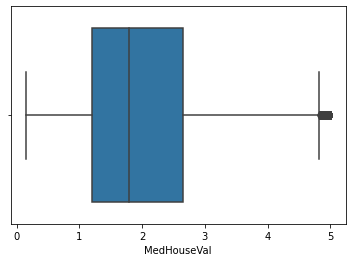

In [10]:
# Итак, смотрим, что у нас происходит с целевой переменной. 
get_boxplot(df, columns = ['MedHouseVal'])


In [11]:
# Видим хвост справа и явно выбивающуюся из общего массива группу значений.
# Попробуем посмотреть, какие данные попадают в этот "хвост" по всем колонкам, не только по целевой
print(df[df.MedHouseVal>4.8].count())
df[df.MedHouseVal>4.5].head(20)

MedInc         1079
HouseAge       1079
AveRooms       1079
AveBedrms      1079
Population     1079
AveOccup       1079
Latitude       1079
Longitude      1079
MedHouseVal    1079
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.52600
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
491,5.0463,52.0,5.793220,1.077966,719.0,2.437288,37.86,-122.25,4.56300
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
510,11.8603,39.0,7.911111,0.984127,808.0,2.565079,37.82,-122.22,5.00001


In [12]:
# Сравним с данными в районе медианы
df[df.MedHouseVal>1.5][df.MedHouseVal<2].head(20)

<ipython-input-12-05fe2d552fd1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.MedHouseVal>1.5][df.MedHouseVal<2].head(20)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,1.913
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,1.592
16,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27,1.525
17,2.1202,52.0,4.052805,0.966997,648.0,2.138614,37.85,-122.27,1.555
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587
19,2.6033,52.0,5.465455,1.083636,690.0,2.509091,37.84,-122.27,1.629
21,1.7135,42.0,4.478142,1.002732,929.0,2.538251,37.85,-122.27,1.598
38,3.4800,52.0,4.757282,1.067961,689.0,2.229773,37.83,-122.26,1.914
39,2.5898,52.0,3.494253,1.027299,1377.0,1.978448,37.83,-122.26,1.760
40,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,1.554


<AxesSubplot:>

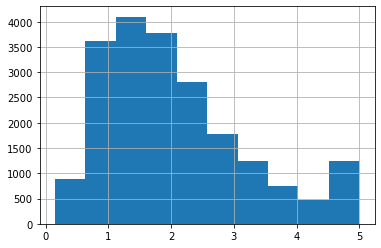

In [13]:
# Может быть, я не прав, но мне этот правый хвост в распределении не кажется похожим на выбросы.
# Тем не менее можно еще посмотреть гистограмму распределения
df.MedHouseVal.hist()

# Получается, что распределение не является нормальным, явно присутствует какая-то отдельная категория домов.
# Возможно, это - дома, расположенные в каком-то элитном районе. Может быть, при дальнейшем анализе что-то станет яснее.

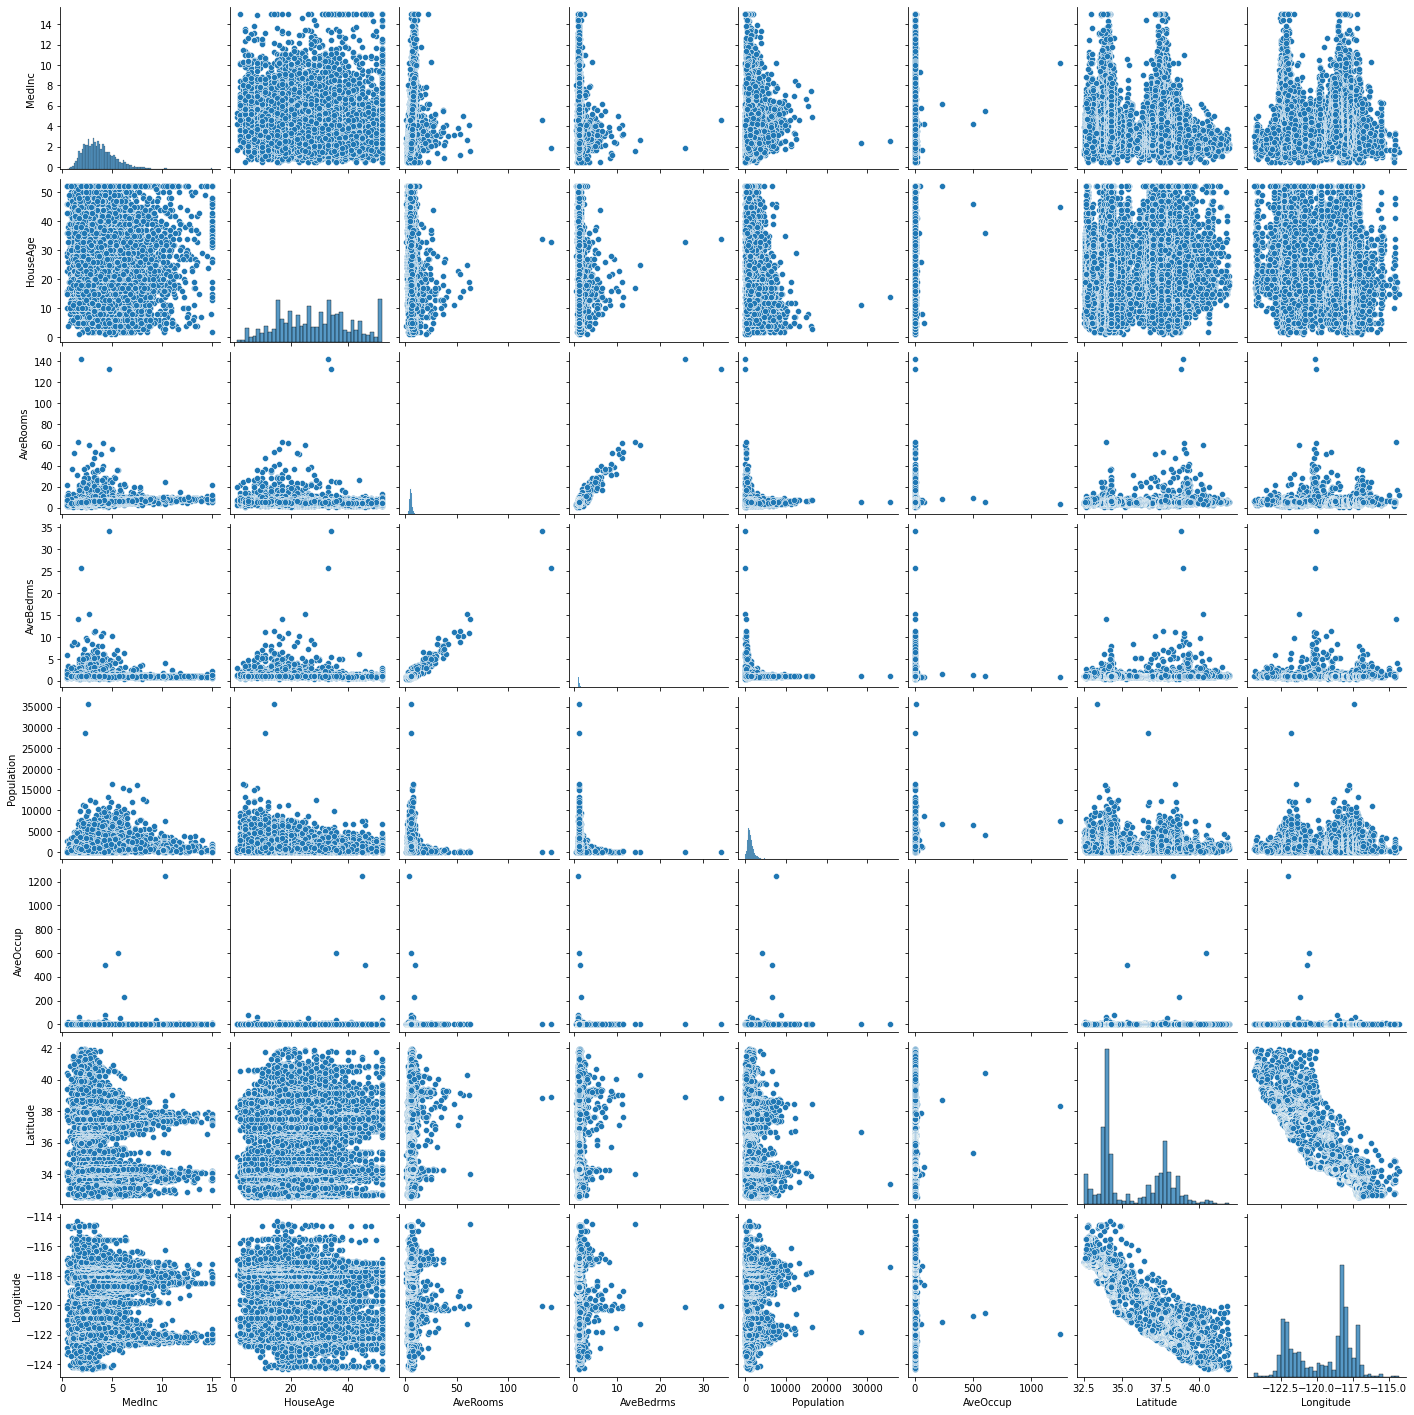

In [19]:
###########################
# Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
# Сделайте выводы.
###########################
# Для начала попробуем посмотреть на данные с помощью метода pairplot библиотеки seaborn.
# Пока просто посмотрим, но далее эти графики помогут в анализе наличия выбросов. И не только.

sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']])


<AxesSubplot:>

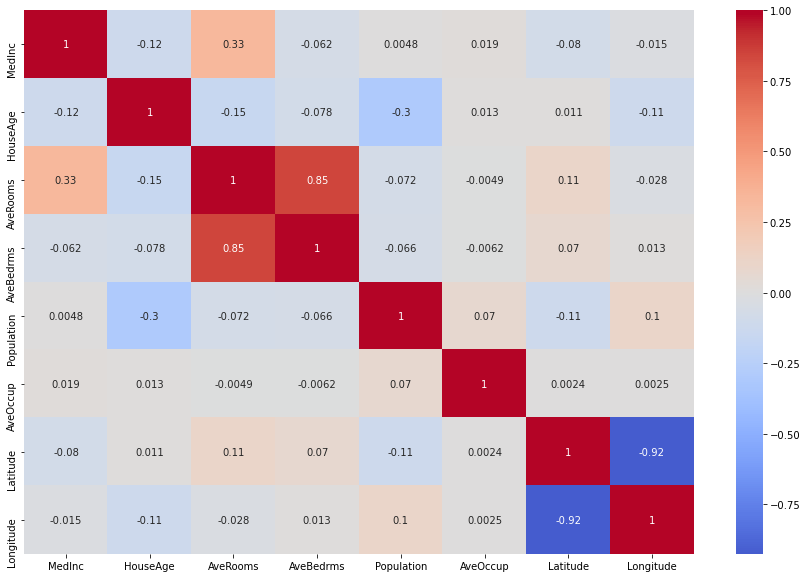

In [18]:
# А теперь вычислим и визуализируем корреляционную матрицу
# (спасибо за советы, найденные здесь: 
# https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(X1.corr(), annot = True, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

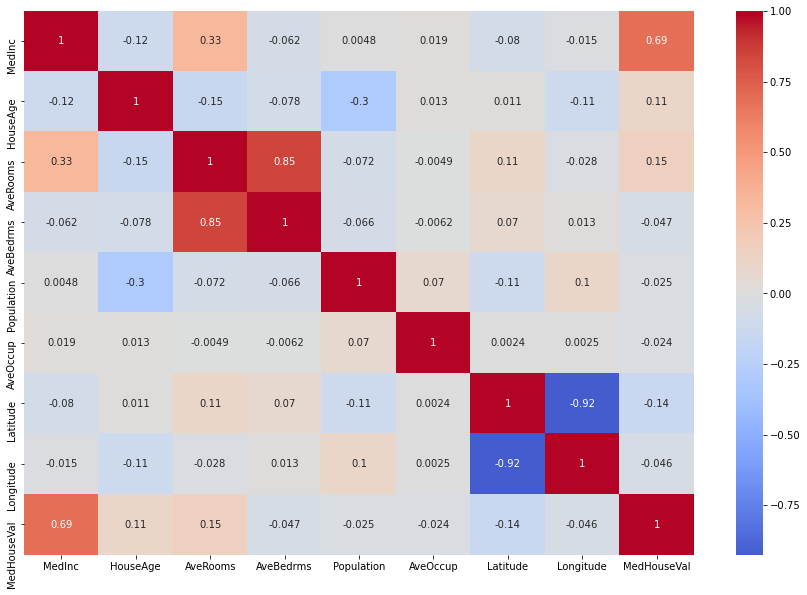

In [20]:
# Выше - корреляционная матрица для текущей выборки всех данных кроме целевого столбца. 
# Подумалось, что правильнее и информативнее будет следующая матрица, в которую добавлен и целевой столбец. 
sns.heatmap(df.corr(), annot = True, center= 0, cmap= 'coolwarm')

In [23]:
# Итак, анализируем корреляционную матрицу. 
# Сразу же бросается в глаза ярко выраженная отрицательная корреляция между широтой и долготой LATITUDE vs LONGITUDE. 
# Кстати это заметно и по гистограммам распределений этих параметров, явно имеющих две вершины и, значит, минимум два кластера
# Можно предположить, что в Калифорнии есть как минимум два крупных кластера, вокруг которых компактно проживает много народу
# (видимо - Лос-Анджелес и Сан-Франциско)
# Учитывая такой высокий уровень корреляции можно либо попытаться отбросить один из этих параметров, либо заменить эти два
# параметра каким-то комплексным значением. Для простоты сейчас просто отброшу один из них. К примеру - Longitude
# Второе наблюдение - явно высокая корреляция между средним количеством комнат в доме текущего района
# и средним количеством спален в доме текущего района AVEROOMS vs AVEBEDRMS.
# Здесь не особенно думая предпочту удалить информацию о спальнях - в любом случае этот параметр вторичен.
# Есть также немаленькая корреляция между средним количеством комнат и медианой доходов семьи, 
# проживающей в доме (0.33) - AVEROOMS vs MEDINCOME
# Неясно при этом, почему такой корреляции не наблюдается между средним количеством спален и средним доходом учитывая
# наличие ранее упомянутой корреляции..
# При этом явным образом наблюдается сильная корреляция между медианным доходом семьи и нашей целевой переменной
# В этой связи очевидно, что MEDINCOME - один из важнейших параметров, которые влияют на качетсво предсказания
# Ну а раз мы его оставляем, я меняю решение и удалю не AVEBEDROOMS, а AVEROOMS. Таким образом мы избавимся сразу от двух
# сильных корреляций и сохраним максимально независимые столбцы в датасете.
#
# Далее создам ряд копий исходного и промежуточных датасетов. Понимаю, что с точки зрения расходов памяти это некрасиво,
# но для того, чтобы в любой момент можно было вернуться к предыдущему шагу и исправить возможные ошибки,
# не выполняя повторно код всего ноутбука, пойду на такое преступление.



In [48]:
###########################
# Удалите признаки на основании полученных значений, выводов.
###########################

df2 = df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']].copy()


In [44]:
###########################
# Повторите п. 3, п. 4 на измененных данных.
###########################
X2 =  df2[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']]
y2 = df2[['MedHouseVal']]

ret_mse_2, ret_rmse_2, ret_r2_2 = get_score(X=X2, y=y2, print_metrics=True)

Корень из среднеквадратичной ошибки (RMSE) 0.8068376614659282
Коэффициент детерминации (R2) 0.5032184434254285


In [45]:
# Результаты предсказания ухудшились, причем значительно!  И это конечно не здорово.
# Пробую повторить эксперимент, но в этот раз избавляемся только от информации про спальни
X2_ =  df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude']]
y2_ = df[['MedHouseVal']]

ret_mse_2_, ret_rmse_2_, ret_r2_2_ = get_score(X=X2_, y=y2_, print_metrics=True)

# Этот эксперимент оказался более успешным - мы слегка подтянули метрики

Корень из среднеквадратичной ошибки (RMSE) 0.7398151789804083
Коэффициент детерминации (R2) 0.5823239094526445


In [46]:
# Мне не очень нравятся результаты проведенных экспериментов, поэтому я проверю сейчас другую гипотезу.
# Попробую избавиться от ряда колонок, основываясь не на взаимных корреляциях признаков, а на их корреляциях
# с целевой колонкой.
# Если убрать колонки с самой низкой корреляцией, то теоретически это может улучшить модель.
# Удалю для начала две колонки с коэффициентами корреляции с целевой колонкой менее 3 процентов.
# AveOccup и Population
X3 =  df[['MedInc', 'HouseAge', 'AveRooms', 'Longitude', 'Latitude']]
y3 = df[['MedHouseVal']]

ret_mse_3, ret_rmse_3, ret_r2_3 = get_score(X=X3, y=y3, print_metrics=True)

# Вижу, что особого выигрыша это не дало и, напротив, даже слегка ухудшило прогноз.

Корень из среднеквадратичной ошибки (RMSE) 0.7406555966702126
Коэффициент детерминации (R2) 0.5813744243302476


In [49]:
###########################
# Исследуйте оставленные признаки на выбросы.
###########################
# Итого на данный момент лучшие результаты показала модель со следующими оставленными признаками:
# 'MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude'
# Рассмотрим эти поля с точки зрения удаления возможных выбросов
# Ранее выводилась большая таблица с графиками взаимных распределений. Сейчас посмотрим на эти распределения более пристально,
# выделив сразу те параметры, для которых могут существовать выбросы.
df2.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
# Для поиска выбросов хороший способ анализа - сравнение средних значений по параметру с максимальными значениями.
# Также можно сравнить максимум и с персентилем 75. Это будет даже более убедительным
# Прекрасные примеры явных выбросов при таком анализе сразу видны.
#

def max_vs_percentile(seria_, prcnt):
    return seria_.max() / seria_.quantile(q=prcnt)

for col in ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude']:
    print(f'Для колонки {col} максимальное значение больше 75 квартиля в {max_vs_percentile(df2[col], 0.75)} раз')

# Во-первых неожиданный результат "прилетел" по долготе, но он понятен - значения долготы - отрицательные числа.
# Во-вторых - о выбросах. Первые претенденты на наличие выбросов - колонки AveOccup, AveRooms и Population
# Посмотрим внимательнее гистограммы по этим колонкам

Для колонки MedInc максимальное значение больше 75 квартиля в 3.162409740157065 раз
Для колонки HouseAge максимальное значение больше 75 квартиля в 1.4054054054054055 раз
Для колонки AveRooms максимальное значение больше 75 квартиля в 23.44682068521565 раз
Для колонки Population максимальное значение больше 75 квартиля в 20.68521739130435 раз
Для колонки AveOccup максимальное значение больше 75 квартиля в 378.8039287609312 раз
Для колонки Longitude максимальное значение больше 75 квартиля в 0.968646724853826 раз
Для колонки Latitude максимальное значение больше 75 квартиля в 1.1124370193582604 раз


<AxesSubplot:>

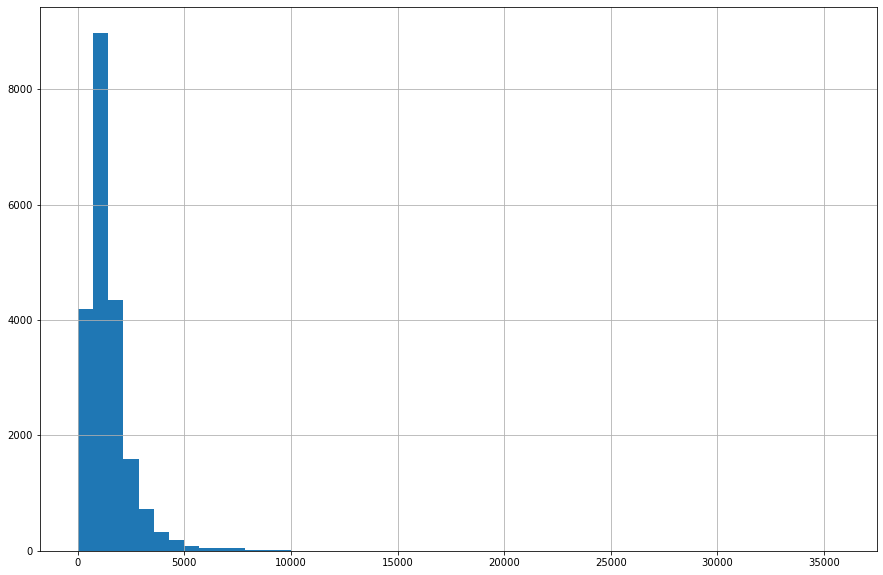

In [57]:
# Колонка Population
df2['Population'].hist(bins=50)
# Я бы обрезал данные примерно до значения 10000

<AxesSubplot:>

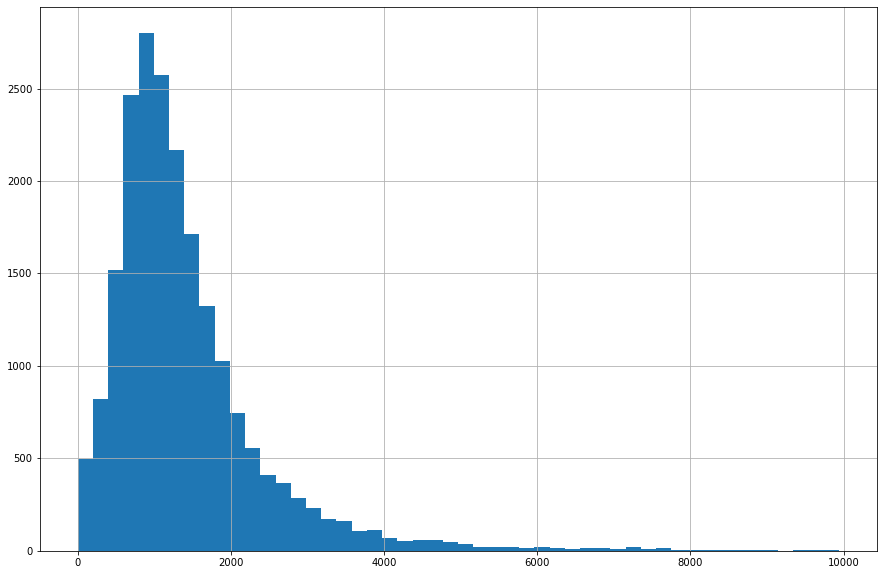

In [61]:
# Колонка Population
df2[df2.Population < 10000]['Population'].hist(bins=50)

<AxesSubplot:>

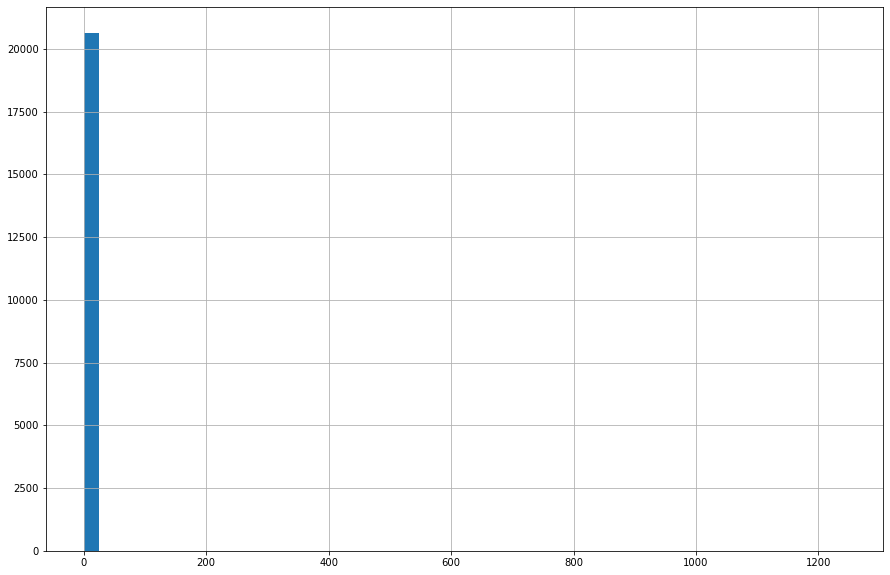

In [58]:
# Колонка AveOccup
df2['AveOccup'].hist(bins=50)
# Как обрезать, пока не вполне ясно. Попробую обрезать по значению 20

<AxesSubplot:>

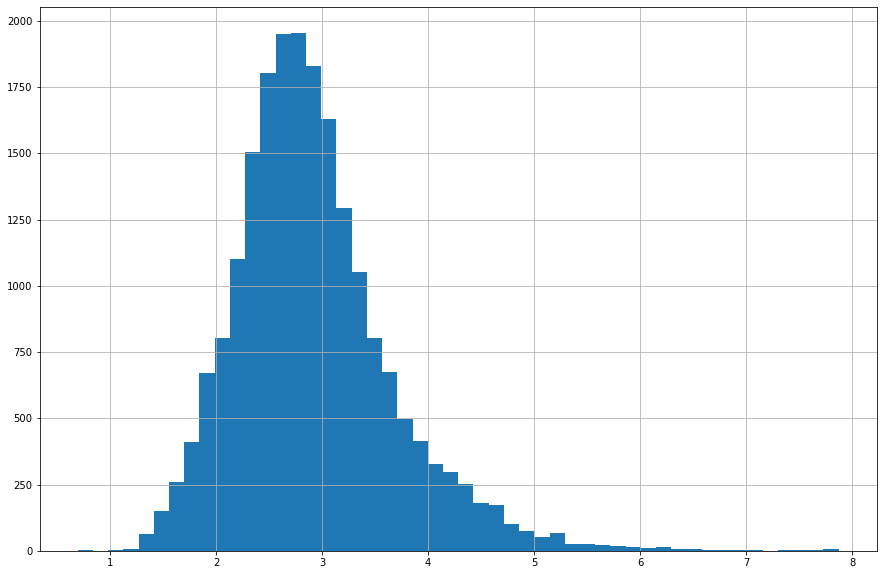

In [71]:
# Колонка AveOccup
df2[df2.AveOccup<8]['AveOccup'].hist(bins=50)
# Вот так яснее. Обрежу по десятку.

<AxesSubplot:>

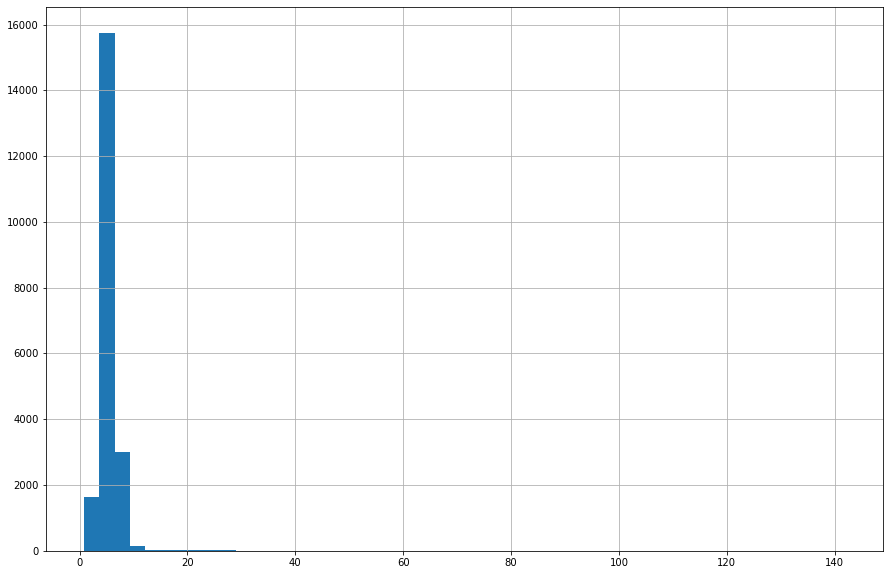

In [60]:
# Колонка AveRooms
df2['AveRooms'].hist(bins=50)
# Где-то до значения 30 можно смело резать.

<AxesSubplot:>

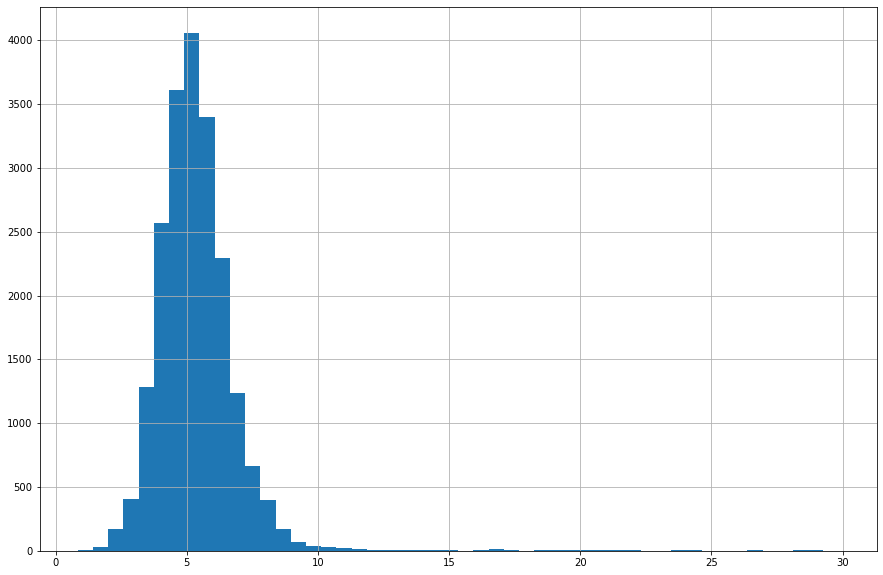

In [63]:
# Колонка AveRooms
df2[df2.AveRooms<30]['AveRooms'].hist(bins=50)

In [77]:
###########################
# Удалите выбросы в случае обнаружения
###########################
# Создаем копию датафрейма без выбросов
fltr = (df.Population < 10000) & (df.AveRooms < 30) & (df.AveOccup < 10)
df3 = df2[fltr].copy()

print(f'В результате фильтрации осталось {df3.MedInc.count()} строк из {df.MedInc.count()}')

В результате фильтрации осталось 20556 строк из 20640


In [78]:
###########################
# Повторите п. 3, п. 4 на измененных данных
###########################
X4 =  df3[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude']]
y4 = df3[['MedHouseVal']]

ret_mse_4, ret_rmse_4, ret_r2_4 = get_score(X=X4, y=y4, print_metrics=True)

# Отлично! Обе метрики явно стали лучше!

Корень из среднеквадратичной ошибки (RMSE) 0.6804949845056513
Коэффициент детерминации (R2) 0.6589930652498286


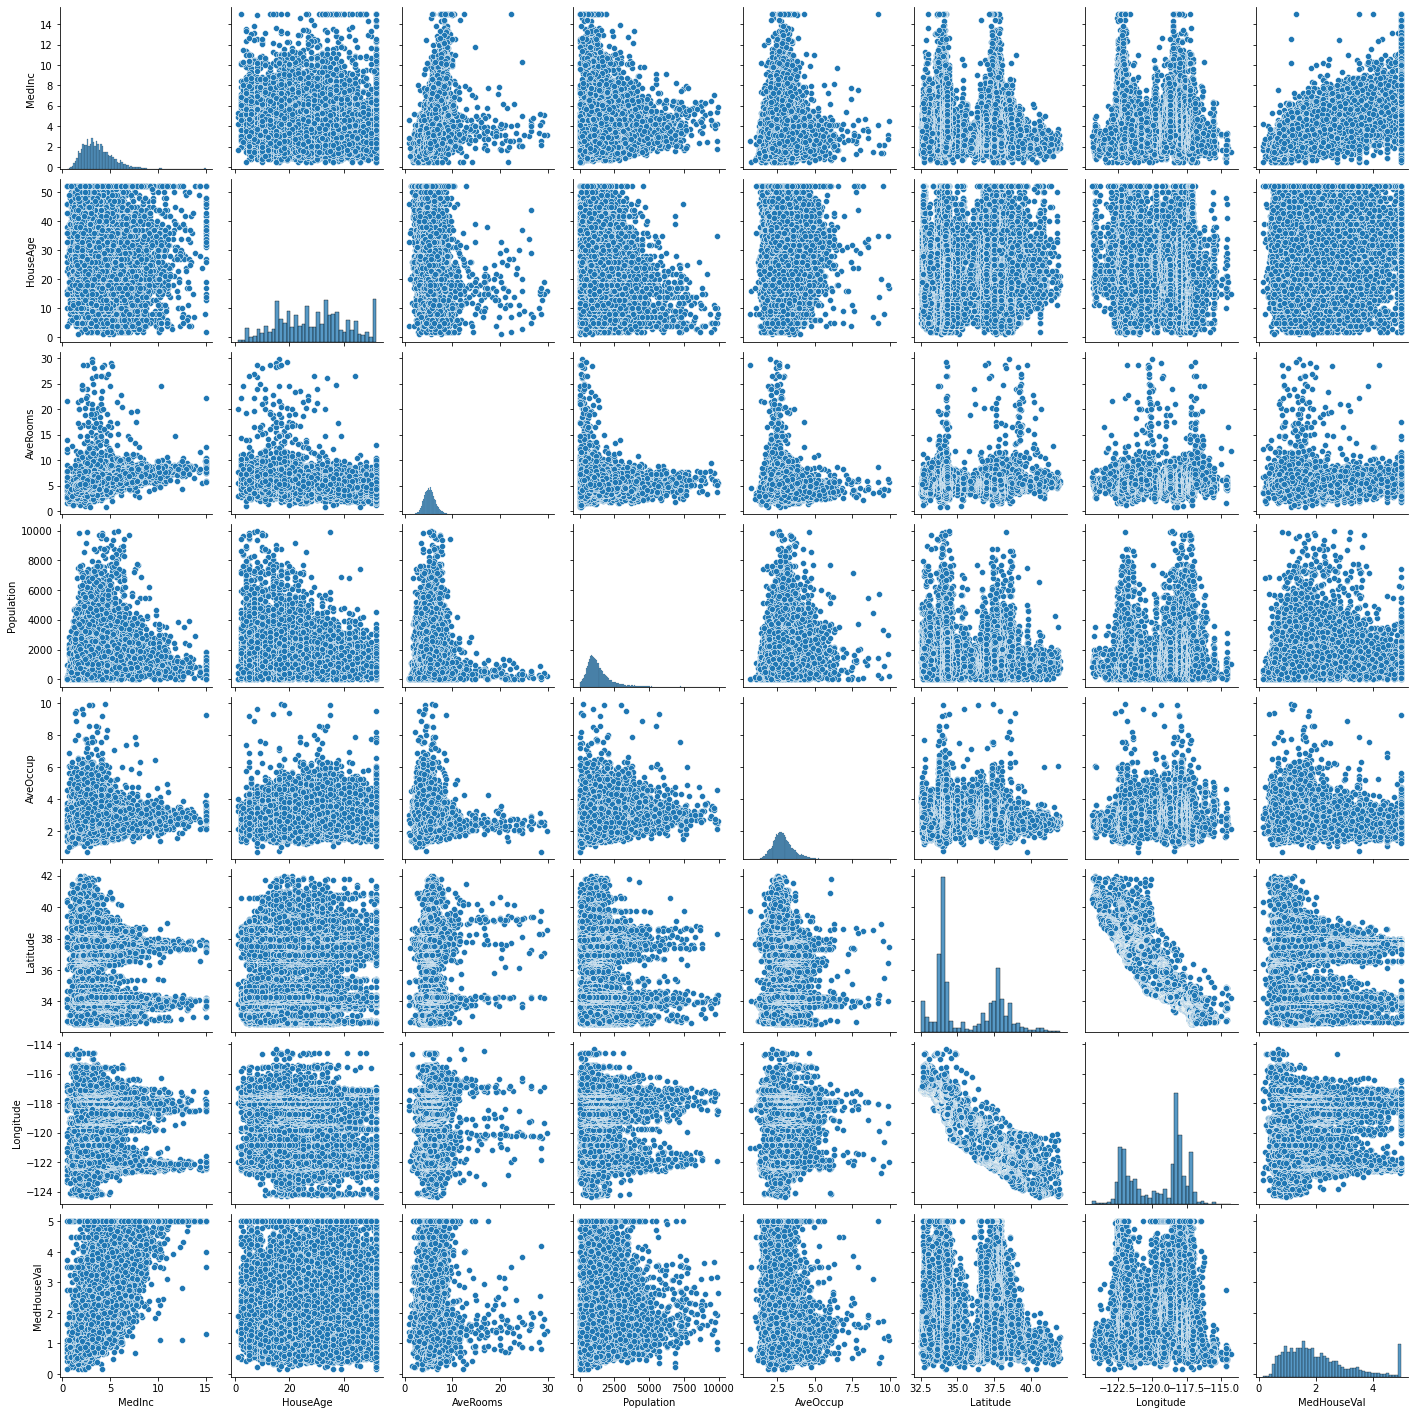

In [74]:
###########################
# Измените несколько признаков на выбор математически. 
# Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
###########################
# Посмотрим на обновленный график распределений и подумаем, что можно сделать:
sns.pairplot(df3[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']])

In [79]:
# Если честно, то мне кажется, что раз уж это домашнее задание у нас оказалось после лекции про переменные,
# логично было бы использовать те методы, которые на этой лекции изучались. 
# Я бы в данном случае "поигрался" с z-преобразованиями.
# Делаю еще одну (последнюю!) копию датафрейма и прямо в нем буду заменять данные
df4 = df3.copy()
df4.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20556.000000,20556.000000,20556.000000,20556.000000,20556.000000,20556.000000,20556.000000,20556.000000
mean,3.870384,28.670558,5.374491,1410.699698,2.918513,35.628680,-119.569743,2.069286
std,1.897302,12.569645,1.670283,1027.944280,0.764288,2.134984,2.004079,1.153790
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564300,18.000000,4.439083,788.000000,2.429279,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.226796,1166.000000,2.817498,34.250000,-118.490000,1.798000
75%,4.743700,37.000000,6.047516,1722.000000,3.279337,37.710000,-118.010000,2.649250
max,15.000100,52.000000,29.852941,9936.000000,9.954545,41.950000,-114.310000,5.000010


In [82]:
# Небольшая функция в помощь
def z_col(seria):
    seria -= seria.mean()
    seria /= seria.std()
    return seria

for col in ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']:
    df4[col] = z_col(df4[col])
    
df4.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.055600e+04,2.055600e+04,2.055600e+04,2.055600e+04,2.055600e+04,2.055600e+04,2.055600e+04,20556.000000
mean,1.145005e-17,1.470003e-15,3.813913e-15,4.429030e-17,-1.263308e-14,-9.207791e-14,-1.646667e-12,2.069286
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.153790
min,-1.776461e+00,-2.201380e+00,-2.711119e+00,-1.369432e+00,-2.912782e+00,-1.446699e+00,-2.385264e+00,0.149990
25%,-6.883901e-01,-8.489149e-01,-5.600292e-01,-6.057718e-01,-6.401171e-01,-7.956406e-01,-1.112859e+00,1.196000
50%,-1.769270e-01,2.620930e-02,-8.842471e-02,-2.380476e-01,-1.321696e-01,-6.457566e-01,5.387725e-01,1.798000
75%,4.602936e-01,6.626633e-01,4.029410e-01,3.028377e-01,4.721042e-01,9.748642e-01,7.782840e-01,2.649250
max,5.866075e+00,1.856014e+00,1.465527e+01,8.293543e+00,9.205991e+00,2.960827e+00,2.624519e+00,5.000010


In [83]:
###########################
# Повторите п. 3, п. 4 на измененных данных. 
###########################
X5 =  df4[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude']]
y5 = df4[['MedHouseVal']]

ret_mse_5, ret_rmse_5, ret_r2_5 = get_score(X=X5, y=y5, print_metrics=True)

# Очень любопытно, результат неожиданный. Он - такой же, как и до применения этого преобразования.
# Вероятно, модель логистической регрессии в данном случае не нуждается в такого рода преобразованиях.
# Если немного подумать, становится ясно, почему.

Корень из среднеквадратичной ошибки (RMSE) 0.6804949845056506
Коэффициент детерминации (R2) 0.6589930652498293


In [86]:
# Чтобы провести еще хотя бы один эксперимент, связанный с условием последнего задания, случайным образом сделаю что-нибудь
# К примеру, можно попробовать вместо двух колонок с широтой и долготой получить одну
# Вначале изменим эти колонки, избавившись от отрицательных значений (вычтем из всех значений минимальное)
# а затем сохраним в новой колонке квадратный корень из суммы квадратов широты и долготы
df5 = df3.copy()
df5.Longitude -= df5.Longitude.min()
df5.Latitude -= df5.Latitude.min()
df5.Longitude = df5.Longitude.apply(lambda x: x**2)
df5.Latitude = df5.Latitude.apply(lambda x: x**2)
df5['Position'] = df5['Longitude'] + df5['Latitude']
df5.Position = df5.Position.apply(lambda x: np.sqrt(x))
df5.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Position
0,8.3252,41.0,6.984127,322.0,2.555556,28.5156,4.4944,4.526,5.745433
1,8.3014,21.0,6.238137,2401.0,2.109842,28.3024,4.5369,3.585,5.730558
2,7.2574,52.0,8.288136,496.0,2.802260,28.1961,4.4521,3.521,5.713860
3,5.6431,52.0,5.817352,558.0,2.547945,28.1961,4.4100,3.413,5.710175
4,3.8462,52.0,6.281853,565.0,2.181467,28.1961,4.4100,3.422,5.710175


In [87]:
# Смотрим, что получилось, если посчитать модель без широты и долготы, но с новым параметром
X6 =  df5[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Position']]
y6 = df5[['MedHouseVal']]

ret_mse_6, ret_rmse_6, ret_r2_6 = get_score(X=X6, y=y6, print_metrics=True)

# Это явно была ошибка. Ничего мы не выиграли.

Корень из среднеквадратичной ошибки (RMSE) 0.7230708516171863
Коэффициент детерминации (R2) 0.6149872932851139


In [88]:
# Все, последняя идея, которую проверю. Вернусь на шаг назад и извлеку квадратный корень из количества комнат.
# По распределению видно, что есть целое "облако" многокомнатных домов. Можно попробовать сжать эту историю.
df6 = df3.copy()
df6.AveRooms = df6.AveRooms.apply(lambda x: np.sqrt(x))

X7 =  df6[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude', 'Latitude']]
y7 = df6[['MedHouseVal']]

ret_mse_7, ret_rmse_7, ret_r2_7 = get_score(X=X7, y=y7, print_metrics=True)

# Отыграл доли процента.

Корень из среднеквадратичной ошибки (RMSE) 0.6803795041700356
Коэффициент детерминации (R2) 0.6591087935205739


In [97]:
###########################
# Сравните метрики всех моделей. 
# Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение 
# с указанием их преобразований|.
###########################

results = pd.DataFrame({
    'Название': ['Модель 1','Модель 2','Модель 2_','Модель 3', 'Модель 4','Модель 5','Модель 6', 'Модель 7'], 
    'R2': [ret_r2_1, ret_r2_2, ret_r2_2_, ret_r2_3, ret_r2_4, ret_r2_5, ret_r2_6, ret_r2_7], 
    'RMSE': [ret_rmse_1, ret_rmse_2, ret_rmse_2_, ret_rmse_3, ret_rmse_4, ret_rmse_5, ret_rmse_6, ret_rmse_7],
    'Описание': ['Исходная модель со всеми данными', 'Удалены признаки AveBedrms и Longitude', 'Возвращен признак Longitude', 
                 'Удалены признаки AveOccup и Population', 'Удален признак AveBedrms, удалены выбросы в полях Population, AveRooms, AveOccup', 
                 'К колонкам применено z-преобразование', 'Вместо Longitude и Latitude добавлен признак Position', 
                 'В колонке AveRooms значение параметра заменено квадратным корнем из этого параметра']})
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
results.head(10)

,Название,R2,RMSE,Описание
0,Модель 1,0.575788,0.745581,Исходная модель со всеми данными
1,Модель 2,0.503218,0.806838,Удалены признаки AveBedrms и Longitude
2,Модель 2_,0.582324,0.739815,Возвращен признак Longitude
3,Модель 3,0.581374,0.740656,Удалены признаки AveOccup и Population
4,Модель 4,0.658993,0.680495,"Удален признак AveBedrms, удалены выбросы в полях Population, AveRooms, AveOccup"
5,Модель 5,0.658993,0.680495,К колонкам применено z-преобразование
6,Модель 6,0.614987,0.723071,Вместо Longitude и Latitude добавлен признак Position
7,Модель 7,0.659109,0.680380,В колонке AveRooms значение параметра заменено квадратным корнем из этого параметра


In [96]:
###########################
# Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
###########################
# Несмотря на то, что не все действия привели к результатам, удалось улучшить показатели R2 и RMSE
# с 0.57 и 0.74 до соответственно 0.65 и 0.68, т.е. точность предсказаний улучшилась
# 
# Есть ощущение, что можно было бы выжать дополнительные проценты, но мои идеи кончились.
#

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.